<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/1_Std_dataset_Merging_the_Datasets%2C_preliminary_checks_and_adding_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the property and macroeconomic features dataset, merging the two datasets, preliminary data review and preparation and adding features for year quarters, regions, floor heights and floor size for each property

---

# LOAD LIBRARIES

In [ ]:

!pip install tensorflow
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import uniform, randint
import warnings

# Suppress user warnings
warnings.filterwarnings('ignore')

# Adjust settings to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


# LOAD THE FILES

In [ ]:
# from google.colab import drive


# Mount Google Drive
# drive.mount('/content/drive')

# Define the file path
# file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Datasetv2.csv'

# Load the CSV file into a pandas DataFrame called "dataset"
# dataset = pd.read_csv(file_path)

# Display the shape of the DataFrame
# print("\nDataset Shape:")
# print(f"Rows: {dataset.shape[0]}, Columns: {dataset.shape[1]}")

In [ ]:
#from google.colab import drive


# Mount Google Drive
# drive.mount('/content/drive')

# Define the file path
# file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Property_data_raw_2.csv'

# Load the CSV file into a pandas DataFrame called "proprty_dataset"
# property_dataset = pd.read_csv(file_path)


In [ ]:
# Get the files from GitHub raw URLs for the datasets
dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Datasetv2.csv'
property_dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Property_data_raw_2.csv.csv'

# Read in the data sets
dataset = pd.read_csv(dataset_url)
property_dataset = pd.read_csv(property_dataset_url)


In [ ]:

# Display the shape of the two DataFrames
print("\nDataset Shape:")
print(f"Rows: {dataset.shape[0]}, Columns: {dataset.shape[1]}")
print("\nProperty Dataset Shape:")
print(f"Rows: {property_dataset.shape[0]}, Columns: {property_dataset.shape[1]}")


Dataset Shape:
Rows: 159676, Columns: 15

Property Dataset Shape:
Rows: 39, Columns: 17


### Quick Look at the two property datasets

# PROPERTY DATASET (Centerline Properties)

Quick look at the dataset provided by Centaline Properties (essentially a list of 156,676 property transactions in Hong Kong over a period of 3 years)

In [ ]:
dataset.head()

NameError: name 'dataset' is not defined

In [ ]:
dataset.shape

NameError: name 'dataset' is not defined

In [ ]:
# Check data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159676 non-null  int64  
 1   date                 159676 non-null  object 
 2   address              159676 non-null  object 
 3   price                159676 non-null  int64  
 4   changes              159676 non-null  object 
 5   saleable_area(ft^2)  159676 non-null  object 
 6   unit_rate            159676 non-null  int64  
 7   district             159676 non-null  object 
 8   Tower                60395 non-null   object 
 9   Flat                 152252 non-null  object 
 10  Phase                48336 non-null   object 
 11  Block                54679 non-null   object 
 12  Rental               159676 non-null  bool   
 13  Public Housing       159676 non-null  bool   
 14  floor                159676 non-null  float64
dtypes: bool(2), float

# MARCO INDICIES DATASET

Quick look at the macro economic indicies dataset which contains indicators that could impact the change in property prices. The information is based on statistics provided by the Government of Hong Kong

In [ ]:
property_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   YEAR    39 non-null     int64
 1   MTH     39 non-null     int64
 2   CPI     39 non-null     int64
 3   PC      39 non-null     int64
 4   IR      39 non-null     int64
 5   MW      39 non-null     int64
 6   M3      39 non-null     int64
 7   SD      39 non-null     int64
 8   UR      39 non-null     int64
 9   GDP     39 non-null     int64
 10  CI      39 non-null     int64
 11  HSI     39 non-null     int64
 12  LTV     39 non-null     int64
 13  HS      39 non-null     int64
 14  SOLD    39 non-null     int64
 15  PG      39 non-null     int64
 16  LS      39 non-null     int64
dtypes: int64(17)
memory usage: 5.3 KB


In [ ]:
property_dataset.shape

(39, 17)

In [ ]:
property_dataset.head(40)

,YEAR,MTH,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS
0,2020,1,-2,380,2,17,15,0,4,86,61,26313,1,2308,6110,0,0
1,2020,2,3,379,2,17,15,0,4,86,62,26129,1,2308,6110,0,0
2,2020,3,0,376,1,17,15,0,4,86,63,26603,1,2308,6110,0,0
3,2020,4,0,385,2,17,15,0,6,86,50,24644,1,2308,6110,0,7391
4,2020,5,0,386,1,17,15,0,6,86,51,22961,1,2308,6110,0,7391
5,2020,6,0,387,1,17,15,0,6,86,52,24427,1,2308,6110,0,7391
6,2020,7,-3,385,0,17,16,0,6,86,54,24595,1,2308,6110,0,0
7,2020,8,2,382,0,17,16,0,6,86,57,25177,1,2308,6110,0,0
8,2020,9,-2,383,0,17,16,0,7,86,60,23459,1,2308,6110,0,0
9,2020,10,3,381,0,17,16,0,7,86,60,24107,1,2308,6110,0,6026


In [ ]:
print("Columns in property_dataset:")
print(property_dataset.columns)

Columns in property_dataset:
Index(['YEAR', 'MTH', 'CPI', 'PC', 'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI',
       'HSI', 'LTV', 'HS', 'SOLD', 'PG', 'LS'],
      dtype='object')


In [ ]:
# Check exact column names with their representation
print([repr(col) for col in dataset.columns])

["'Unnamed: 0'", "'date'", "'address'", "'price'", "'changes'", "'saleable_area(ft^2)'", "'unit_rate'", "'district'", "'Tower'", "'Flat'", "'Phase'", "'Block'", "'Rental'", "'Public Housing'", "'floor'"]


In [ ]:
# Remove quotes and extra spaces from column names
dataset.columns = dataset.columns.str.strip().str.replace("'", "")

# Confirm cleaned column names
print("Cleaned column names:")
print(dataset.columns.tolist())

Cleaned column names:
['Unnamed: 0', 'date', 'address', 'price', 'changes', 'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat', 'Phase', 'Block', 'Rental', 'Public Housing', 'floor']



# MERGING DATASETS

### Merge both datasets and switch around columns of the macro economic indicies dataset

In [ ]:
# Merging the dataset
# Step 1: Convert the 'date' column in `dataset` to datetime format
dataset['date'] = pd.to_datetime(dataset['date'], format='%d/%m/%Y', errors='coerce')

# Step 2: Extract 'YEAR' and 'MTH' from the 'date' column
dataset['YEAR'] = dataset['date'].dt.year
dataset['MTH'] = dataset['date'].dt.month

# Step 3: Merge `dataset` with `property_dataset` on 'YEAR' and 'MTH'
merged_dataset = pd.merge(dataset, property_dataset, on=['YEAR', 'MTH'], how='left')

# Verify the merged dataset
print("Merged Dataset:")
print(merged_dataset.head())

Merged Dataset:
   Unnamed: 0       date                                        address  \
0           0 2023-03-09  The Long Beach, Tower 7, Middle Floor, Flat D   
1           1 2023-03-09  One Kai Tak, II, Tower 3, Upper Floor, Flat H   
2           2 2023-03-08        Sky Tower, Block 1, Lower Floor, Flat B   
3           3 2023-03-08    Hampton Place, Tower 2, Upper Floor, Flat F   
4           4 2023-03-08                  Skypark, Upper Floor, Flat A5   

   price changes saleable_area(ft^2)  unit_rate  \
0  33000      --                 816         40   
1  15800      --                 375         42   
2  18800      --                 520         36   
3  17000      --                 429         40   
4  18000      --                 407         44   

                        district Tower Flat Phase Block  Rental  \
0  Kowloon Kowloon City District     7    D   NaN   NaN    True   
1  Kowloon Kowloon City District     3    H   NaN   NaN    True   
2  Kowloon Kowloon City D

In [ ]:
# Formatting the date
# Step 4: Change the date format in the merged dataset to 'DD/MM/YYYY'
merged_dataset['date'] = merged_dataset['date'].dt.strftime('%d/%m/%Y')

# Step 5: Add 'FormattedDate' as a column based on the 'date' column
# Re-convert 'date' to datetime for proper handling
merged_dataset['FormattedDate'] = pd.to_datetime(merged_dataset['date'], format='%d/%m/%Y', errors='coerce')

# Verify the formatted date columns
print("\nDataset with Formatted Dates:")
print(merged_dataset[['date', 'FormattedDate']].head())


Dataset with Formatted Dates:
         date FormattedDate
0  09/03/2023    2023-03-09
1  09/03/2023    2023-03-09
2  08/03/2023    2023-03-08
3  08/03/2023    2023-03-08
4  08/03/2023    2023-03-08


In [ ]:
# unique timestamp
from datetime import timedelta

# Step 1: Add unique timestamps by offsetting duplicates
merged_dataset['Timestamp'] = merged_dataset['FormattedDate']  # Start with FormattedDate
merged_dataset['Timestamp'] += merged_dataset.groupby('Timestamp').cumcount().map(lambda x: timedelta(seconds=x))

# Step 2: Set the Timestamp as the index
merged_dataset.set_index('Timestamp', inplace=True)

# Step 3: Print the first 5 rows
print("\nFirst 5 rows of the dataset with Timestamp as Index:")
print(merged_dataset.head(5))



First 5 rows of the dataset with Timestamp as Index:
                     Unnamed: 0        date  \
Timestamp                                     
2023-03-09 00:00:00           0  09/03/2023   
2023-03-09 00:00:01           1  09/03/2023   
2023-03-08 00:00:00           2  08/03/2023   
2023-03-08 00:00:01           3  08/03/2023   
2023-03-08 00:00:02           4  08/03/2023   

                                                           address  price  \
Timestamp                                                                   
2023-03-09 00:00:00  The Long Beach, Tower 7, Middle Floor, Flat D  33000   
2023-03-09 00:00:01  One Kai Tak, II, Tower 3, Upper Floor, Flat H  15800   
2023-03-08 00:00:00        Sky Tower, Block 1, Lower Floor, Flat B  18800   
2023-03-08 00:00:01    Hampton Place, Tower 2, Upper Floor, Flat F  17000   
2023-03-08 00:00:02                  Skypark, Upper Floor, Flat A5  18000   

                    changes saleable_area(ft^2)  unit_rate  \
Timestamp     

In [ ]:
print("Columns after merging:")
print(merged_dataset.columns)

Columns after merging:
Index(['Unnamed: 0', 'date', 'address', 'price', 'changes',
       'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat',
       'Phase', 'Block', 'Rental', 'Public Housing', 'floor', 'YEAR', 'MTH',
       'CPI', 'PC', 'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV',
       'HS', 'SOLD', 'PG', 'LS', 'FormattedDate'],
      dtype='object')


In [ ]:
print(merged_dataset.columns.tolist())

['Unnamed: 0', 'date', 'address', 'price', 'changes', 'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat', 'Phase', 'Block', 'Rental', 'Public Housing', 'floor', 'YEAR', 'MTH', 'CPI', 'PC', 'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD', 'PG', 'LS', 'FormattedDate']


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159676 entries, 2023-03-09 00:00:00 to 2021-06-11 00:01:49
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           159676 non-null  int64         
 1   date                 159676 non-null  object        
 2   address              159676 non-null  object        
 3   price                159676 non-null  int64         
 4   changes              159676 non-null  object        
 5   saleable_area(ft^2)  159676 non-null  object        
 6   unit_rate            159676 non-null  int64         
 7   district             159676 non-null  object        
 8   Tower                60395 non-null   object        
 9   Flat                 152252 non-null  object        
 10  Phase                48336 non-null   object        
 11  Block                54679 non-null   object        
 12  Rental               159676 non-null  

In [ ]:

# Check for NaT values in the 'FormattedDate' column
nat_count = dataset['date'].isna().sum()  # Check for NaT in the 'date' column
print(f"Number of NaT values in the 'date' column: {nat_count}")

# Display rows with NaT values in the 'date' column
if nat_count > 0:
    print("\nRows with NaT values in 'date':")
    print(dataset[dataset['date'].isna()])

Number of NaT values in the 'date' column: 0


# PRELIMINARY DATA PREPERATION

In [ ]:
merged_dataset.head(5)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,Phase,Block,Rental,Public Housing,floor,YEAR,MTH,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS,FormattedDate
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-03-09 00:00:00,0,09/03/2023,"The Long Beach, Tower 7, Middle Floor, Flat D",33000,--,816,40,Kowloon Kowloon City District,7,D,NaN,NaN,True,False,13.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-09
2023-03-09 00:00:01,1,09/03/2023,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",15800,--,375,42,Kowloon Kowloon City District,3,H,NaN,NaN,True,False,22.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-09
2023-03-08 00:00:00,2,08/03/2023,"Sky Tower, Block 1, Lower Floor, Flat B",18800,--,520,36,Kowloon Kowloon City District,NaN,B,NaN,1,True,False,7.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08
2023-03-08 00:00:01,3,08/03/2023,"Hampton Place, Tower 2, Upper Floor, Flat F",17000,--,429,40,Kowloon Kowloon City District,2,F,NaN,NaN,True,False,22.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08
2023-03-08 00:00:02,4,08/03/2023,"Skypark, Upper Floor, Flat A5",18000,--,407,44,Kowloon Kowloon City District,NaN,A,NaN,NaN,True,False,22.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08


In [ ]:
merged_dataset.shape

(159676, 33)

In [ ]:
# Look at the data types in the merged_database
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159676 entries, 2023-03-09 00:00:00 to 2021-06-11 00:01:49
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           159676 non-null  int64         
 1   date                 159676 non-null  object        
 2   address              159676 non-null  object        
 3   price                159676 non-null  int64         
 4   changes              159676 non-null  object        
 5   saleable_area(ft^2)  159676 non-null  object        
 6   unit_rate            159676 non-null  int64         
 7   district             159676 non-null  object        
 8   Tower                60395 non-null   object        
 9   Flat                 152252 non-null  object        
 10  Phase                48336 non-null   object        
 11  Block                54679 non-null   object        
 12  Rental               159676 non-null  

In [ ]:
# Drop unnamed column
merged_dataset.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
# Check for null Values
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

NameError: name 'merged_dataset' is not defined

There are significant numbers of null values in some of the address fields on some of the properties which is expects as some properties will not have towere, flat, phase and block in their addreses. These will have to be deleted later

In [ ]:
# Check for duplicate rows
duplicates_count = merged_dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicate rows
merged_dataset.drop_duplicates(inplace=True)

# Shape of the DataFrame after removing duplicates
merged_dataset.shape

Number of duplicate rows: 64


(159612, 32)

## Fixing the rounded Price

In [ ]:
# Clean and convert the 'saleable_area(ft^2)' column in the merged_dataset
merged_dataset['saleable_area(ft^2)'] = (
    merged_dataset['saleable_area(ft^2)']
    .astype(str)  # Ensure the column is a string for string operations
    .str.replace(',', '')  # Remove commas
    .str.strip()  # Remove leading and trailing spaces
    .replace('', None)  # Replace empty strings with None (to handle them as nulls)
    .dropna()  # Drop rows with null values in this column
)

# Convert the cleaned column to integers
merged_dataset['saleable_area(ft^2)'] = pd.to_numeric(merged_dataset['saleable_area(ft^2)'], errors='coerce', downcast='integer')

# Drop rows where conversion to numeric resulted in NaN (invalid values)
merged_dataset = merged_dataset.dropna(subset=['saleable_area(ft^2)']).reset_index(drop=True)

# Confirm the column is now of integer type
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].astype(int)

# Print the cleaned column data
print(merged_dataset['saleable_area(ft^2)'].head())

0    816
1    375
2    520
3    429
4    407
Name: saleable_area(ft^2), dtype: int64


In [ ]:
# Now create a new_price column with corrected non rounded figures
# Add a new 'price' column calculated as 'saleable_area(ft^2)' * 'unit_rate'
merged_dataset['new_price'] = merged_dataset['saleable_area(ft^2)'] * merged_dataset['unit_rate']

# Print the first 5 rows of the dataset_datasetFrame
print("First 5 rows of the dataset_datasetFrame with the new 'price' column:")
display(merged_dataset.head(5))
merged_dataset.info()

First 5 rows of the dataset_datasetFrame with the new 'price' column:


,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,Phase,Block,Rental,Public Housing,floor,YEAR,MTH,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS,FormattedDate,new_price
0,09/03/2023,"The Long Beach, Tower 7, Middle Floor, Flat D",33000,--,816,40,Kowloon Kowloon City District,7,D,NaN,NaN,True,False,13.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-09,32640
1,09/03/2023,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",15800,--,375,42,Kowloon Kowloon City District,3,H,NaN,NaN,True,False,22.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-09,15750
2,08/03/2023,"Sky Tower, Block 1, Lower Floor, Flat B",18800,--,520,36,Kowloon Kowloon City District,NaN,B,NaN,1,True,False,7.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,18720
3,08/03/2023,"Hampton Place, Tower 2, Upper Floor, Flat F",17000,--,429,40,Kowloon Kowloon City District,2,F,NaN,NaN,True,False,22.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,17160
4,08/03/2023,"Skypark, Upper Floor, Flat A5",18000,--,407,44,Kowloon Kowloon City District,NaN,A,NaN,NaN,True,False,22.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,17908


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159612 entries, 0 to 159611
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 159612 non-null  object        
 1   address              159612 non-null  object        
 2   price                159612 non-null  int64         
 3   changes              159612 non-null  object        
 4   saleable_area(ft^2)  159612 non-null  int64         
 5   unit_rate            159612 non-null  int64         
 6   district             159612 non-null  object        
 7   Tower                60364 non-null   object        
 8   Flat                 152190 non-null  object        
 9   Phase                48320 non-null   object        
 10  Block                54661 non-null   object        
 11  Rental               159612 non-null  bool          
 12  Public Housing       159612 non-null  bool          
 13  floor         

In [ ]:
# Create a 'new_price' column with corrected non-rounded figures
# Calculate 'new_price' as 'saleable_area(ft^2)' * 'unit_rate'
merged_dataset['new_price'] = merged_dataset['saleable_area(ft^2)'] * merged_dataset['unit_rate']

# Drop the old 'price' column
if 'price' in merged_dataset.columns:
    merged_dataset = merged_dataset.drop(columns=['price'])

# Print the first 5 rows of the updated DataFrame
print("First 5 rows of the DataFrame with the new 'new_price' column and without the old 'price' column:")
display(merged_dataset.head(5))

# Print the list of columns in the updated DataFrame
print("Updated columns in the DataFrame:")
print(merged_dataset.columns)

First 5 rows of the DataFrame with the new 'new_price' column and without the old 'price' column:


,date,address,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,Phase,Block,Rental,Public Housing,floor,YEAR,MTH,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS,FormattedDate,new_price
0,09/03/2023,"The Long Beach, Tower 7, Middle Floor, Flat D",--,816,40,Kowloon Kowloon City District,7,D,NaN,NaN,True,False,13.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-09,32640
1,09/03/2023,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",--,375,42,Kowloon Kowloon City District,3,H,NaN,NaN,True,False,22.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-09,15750
2,08/03/2023,"Sky Tower, Block 1, Lower Floor, Flat B",--,520,36,Kowloon Kowloon City District,NaN,B,NaN,1,True,False,7.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,18720
3,08/03/2023,"Hampton Place, Tower 2, Upper Floor, Flat F",--,429,40,Kowloon Kowloon City District,2,F,NaN,NaN,True,False,22.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,17160
4,08/03/2023,"Skypark, Upper Floor, Flat A5",--,407,44,Kowloon Kowloon City District,NaN,A,NaN,NaN,True,False,22.0,2023,3,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,17908


Updated columns in the DataFrame:
Index(['date', 'address', 'changes', 'saleable_area(ft^2)', 'unit_rate',
       'district', 'Tower', 'Flat', 'Phase', 'Block', 'Rental',
       'Public Housing', 'floor', 'YEAR', 'MTH', 'CPI', 'PC', 'IR', 'MW', 'M3',
       'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD', 'PG', 'LS',
       'FormattedDate', 'new_price'],
      dtype='object')


## Removing  'Rental' and 'Public Housing'


## Check properties sold that were are Public Housing" as opposed to private housing

In [ ]:
# Count the number of rows where 'Public Housing' is True
true_count = merged_dataset['Public Housing'].sum()

print("Number of True rows in 'Public Housing':", true_count)

Number of True rows in 'Public Housing': 1553


In [ ]:
# Check the shape of the dataset before deleting rows where 'Rental' is True
print("Shape before deletion:", merged_dataset.shape)

# Delete rows where 'Rental' is True
merged_dataset = merged_dataset[merged_dataset['Public Housing'] != True]

# Check the shape of the dataset after deletion
print("Shape after deletion:", merged_dataset.shape)

# Count the number of rows where 'Public Housing' is True (i.e., properties sold that are Public Housing)
public_housing_count = merged_dataset['Public Housing'].sum()

print("Number of properties sold that are Public Housing:", public_housing_count)

Shape before deletion: (159612, 32)
Shape after deletion: (158059, 32)
Number of properties sold that are Public Housing: 0


## Check the dataset for Rental properties = True (this means they are rental properties)


In [ ]:
# Count the number of rows where 'Rental' is True
true_count = merged_dataset['Rental'].sum()

print("Number of True rows in 'Rental':", true_count)
# We need to delete these as we are focusing on property purchase

Number of True rows in 'Rental': 48208


In [ ]:
# Count the number of rows where 'Rental' is True (i.e., rental properties)
rental_count = merged_dataset['Rental'].sum()

print("Number of True rows in 'Rental' (Rental properties):", rental_count)

# Check the shape of the dataset before deleting rows where 'Rental' is True
print("Shape before deletion:", merged_dataset.shape)

# Delete rows where 'Rental' is True
merged_dataset = merged_dataset[merged_dataset['Rental'] != True]

# Check the shape of the dataset after deletion
print("Shape after deletion:", merged_dataset.shape)

# Count the number of properties that are not rentals (i.e., purchased properties)
purchased_count = len(merged_dataset)

print("Number of properties sold (non-rental):", purchased_count)

Number of True rows in 'Rental' (Rental properties): 48208
Shape before deletion: (158059, 32)
Shape after deletion: (109851, 32)
Number of properties sold (non-rental): 109851


In [ ]:
# Check the shape of the dataset before deleting columns 'Rental' and 'Public Housing'
print("Shape before column deletion:", merged_dataset.shape)

# Delete the columns 'Rental' and 'Public Housing'
merged_dataset = merged_dataset.drop(columns=['Rental', 'Public Housing'])

# Check the shape of the dataset after deleting the columns
print("Shape after column deletion:", merged_dataset.shape)

Shape before column deletion: (109851, 32)
Shape after column deletion: (109851, 30)


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109851 entries, 7 to 159611
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 109851 non-null  object        
 1   address              109851 non-null  object        
 2   changes              109851 non-null  object        
 3   saleable_area(ft^2)  109851 non-null  int64         
 4   unit_rate            109851 non-null  int64         
 5   district             109851 non-null  object        
 6   Tower                37274 non-null   object        
 7   Flat                 103459 non-null  object        
 8   Phase                31329 non-null   object        
 9   Block                38474 non-null   object        
 10  floor                109851 non-null  float64       
 11  YEAR                 109851 non-null  int32         
 12  MTH                  109851 non-null  int32         
 13  CPI                

In [ ]:
# Check the columns in the DataFrame
print("Columns in merged_dataset before dropping:")
print(merged_dataset.columns)

# Drop unnecessary columns, ignoring errors for missing columns
columns_to_drop = ['Tower', 'Flat', 'Phase', 'Block', 'address', 'changes', 'date', 'YEAR', 'MTH']
merged_dataset = merged_dataset.drop(columns=columns_to_drop, errors='ignore')

# Verify the columns have been dropped
print("Columns in merged_dataset after dropping:")
print(merged_dataset.columns)

Columns in merged_dataset before dropping:
Index(['date', 'address', 'changes', 'saleable_area(ft^2)', 'unit_rate',
       'district', 'Tower', 'Flat', 'Phase', 'Block', 'floor', 'YEAR', 'MTH',
       'CPI', 'PC', 'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV',
       'HS', 'SOLD', 'PG', 'LS', 'FormattedDate', 'new_price'],
      dtype='object')
Columns in merged_dataset after dropping:
Index(['saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'CPI', 'PC',
       'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD',
       'PG', 'LS', 'FormattedDate', 'new_price'],
      dtype='object')


In [ ]:
# Check data types after conversion and make sure macro features are float
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109851 entries, 7 to 159611
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI                

# CREATING MONTHLY QUARTERS

In [ ]:
merged_dataset.info()

NameError: name 'merged_dataset' is not defined

In [ ]:
# Creating YearQuarter
# Step 6: Add a 'YearQuarter' column based on the 'FormattedDate' column
merged_dataset['YearQuarter'] = pd.PeriodIndex(merged_dataset['FormattedDate'], freq='Q').astype(str)

# Verify the updated dataset
print("\nDataset with YearQuarter:")
print(merged_dataset[['FormattedDate', 'YearQuarter']].head())


Dataset with YearQuarter:
   FormattedDate YearQuarter
7     2023-03-08      2023Q1
13    2023-03-08      2023Q1
14    2023-03-08      2023Q1
15    2023-03-08      2023Q1
16    2023-03-08      2023Q1


# CREATING FEATURE REGIONS

In [ ]:
# Look at the types of districts in the database
merged_dataset['district'].unique()

NameError: name 'merged_dataset' is not defined

In [ ]:
# Define the district_region mapping
merged_dataset['district'] = merged_dataset['district'].replace(
    {'HKIsIand Southern District': 'HKIsland Southern District',
     'HKIsIand Eastern District': 'HKIsland Eastern District'}
)
district_region = {
    'Kowloon Kowloon City District': 'KLN',
    'Kowloon Kwun Tong District': 'KLN',
    'Kowloon Yau Tsim Mong District': 'KLN',
    'Kowloon Wong Tai Sin District': 'HK',
    'Kowloon Sham Shui Po District': 'KLN',
    'New Territories East Sha Tin District': 'NTEast',
    'New Territories East Long Ping Estate': 'NTEast',
    'New Territories East North District': 'NTEast',
    'New Territories East Tai Po District': 'NTEast',
    'Kwai Tsing District': 'NTWest',
    'Tsuen Wan District': 'NTWest',
    'Yuen Long District': 'NTWest',
    'Tuen Mun District': 'NTWest',
    'New Territories West Islands District': 'NTWest',
    'Wan Chai District': 'HK',
    'HKIsland Southern District': 'HK',
    'Central and Western District': 'HK',
    'HKIsland Eastern District': 'HK'
}

# Map the 'district' column to create the 'region' column
merged_dataset['region'] = merged_dataset['district'].map(district_region)

# Check for unmapped districts (optional)
unmapped_districts = merged_dataset[merged_dataset['region'].isna()]['district'].unique()
if len(unmapped_districts) > 0:
    print("Unmapped districts:", unmapped_districts)

# Display the first few rows of the updated dataset
display(merged_dataset.head())

,saleable_area(ft^2),unit_rate,district,floor,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS,FormattedDate,new_price,YearQuarter,region
7,423,15792,Kowloon Kowloon City District,22.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,6680016,2023Q1,KLN
13,2190,34703,Kowloon Kowloon City District,7.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,75999570,2023Q1,KLN
14,761,15857,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,12067177,2023Q1,KLN
15,320,13717,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,4389440,2023Q1,KLN
16,519,16541,Kowloon Kowloon City District,29.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,8584779,2023Q1,KLN


# CREATING FEATURE FLOOR HEIGHTS

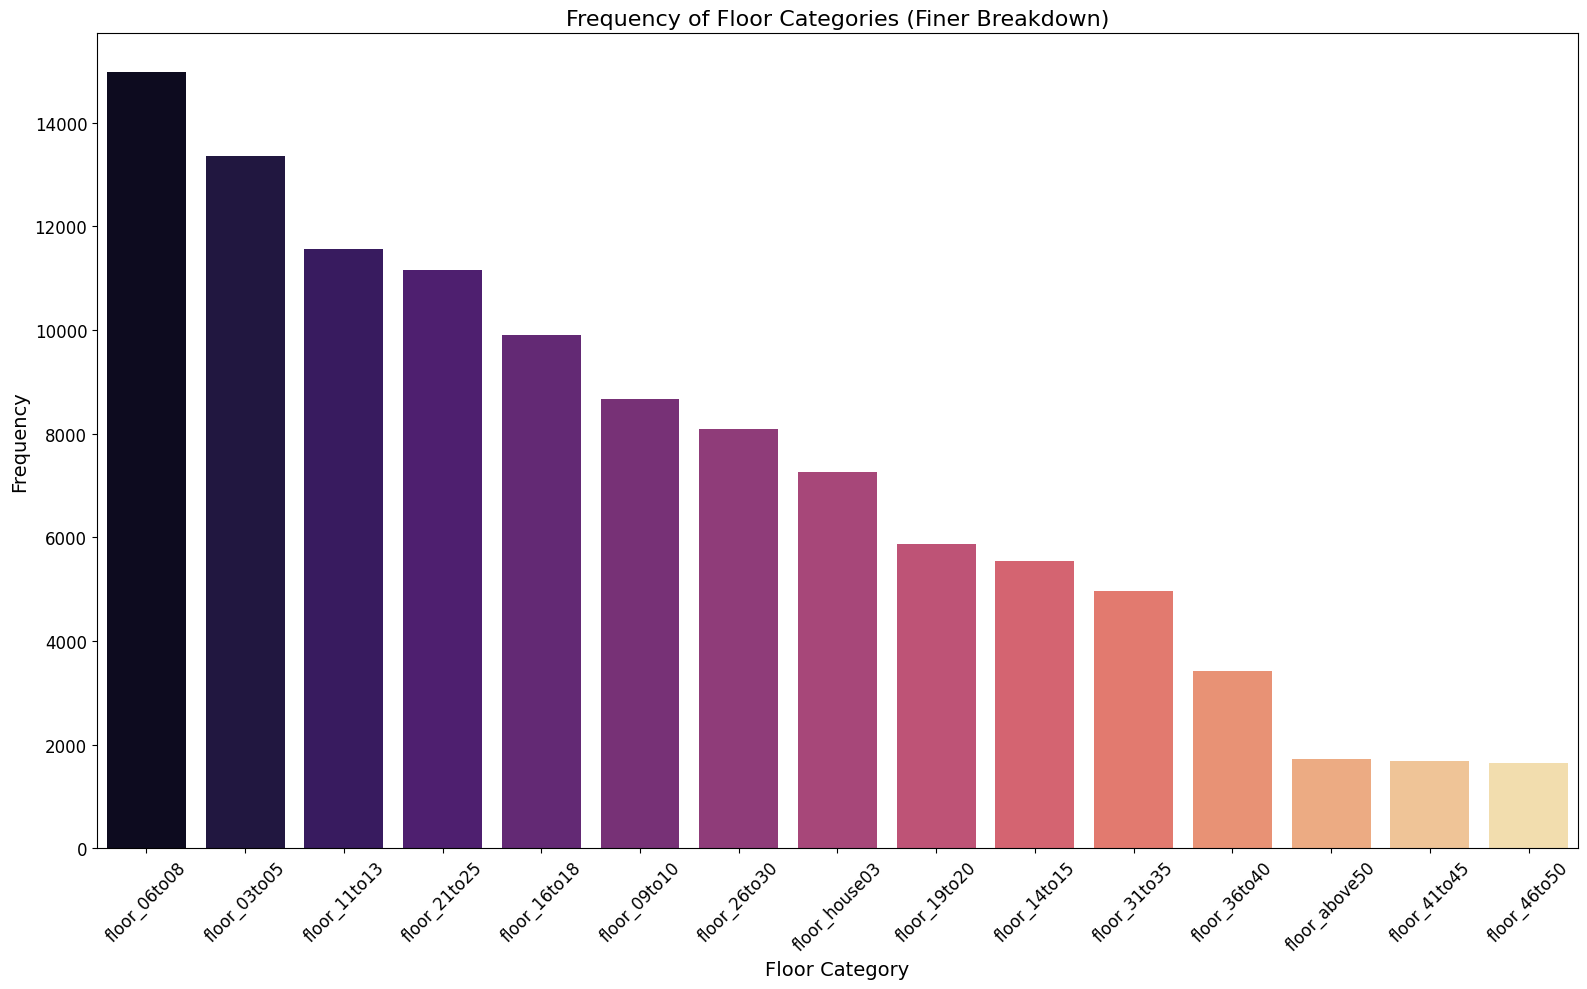

floor_height
floor_06to08     14972
floor_03to05     13347
floor_11to13     11563
floor_21to25     11153
floor_16to18      9898
floor_09to10      8667
floor_26to30      8082
floor_house03     7265
floor_19to20      5880
floor_14to15      5543
floor_31to35      4972
floor_36to40      3432
floor_above50     1728
floor_41to45      1693
floor_46to50      1656
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated function to categorize floor heights with finer zones
def categorize_floor_v7(floor):
    if floor < 3:
        return "floor_house03"  # Floors less than 3
    elif 3 <= floor <= 5:
        return "floor_03to05"  # Floors 3 to 5
    elif 6 <= floor <= 8:
        return "floor_06to08"  # Floors 6 to 8
    elif 9 <= floor <= 10:
        return "floor_09to10"  # Floors 9 to 10
    elif 11 <= floor <= 13:
        return "floor_11to13"  # Floors 11 to 13
    elif 14 <= floor <= 15:
        return "floor_14to15"  # Floors 14 to 15
    elif 16 <= floor <= 18:
        return "floor_16to18"  # Floors 16 to 18
    elif 19 <= floor <= 20:
        return "floor_19to20"  # Floors 19 to 20
    elif 21 <= floor <= 25:
        return "floor_21to25"  # Floors 21 to 25
    elif 26 <= floor <= 30:
        return "floor_26to30"  # Floors 26 to 30
    elif 31 <= floor <= 35:
        return "floor_31to35"  # Floors 31 to 35
    elif 36 <= floor <= 40:
        return "floor_36to40"  # Floors 36 to 40
    elif 41 <= floor <= 45:
        return "floor_41to45"  # Floors 41 to 45
    elif floor > 50:
        return "floor_above50"  # Floors above 50
    else:
        return "floor_46to50"  # Floors 46 to 50

# Apply the updated categorization to the dataset
merged_dataset['floor_height'] = merged_dataset['floor'].apply(categorize_floor_v7)

# Frequency count for the new categories
category_counts_v7 = merged_dataset['floor_height'].value_counts()

# Plot the updated category frequencies
plt.figure(figsize=(16, 10))  # Larger figure size for more categories
sns.barplot(x=category_counts_v7.index, y=category_counts_v7.values, palette="magma")

# Add labels and title with larger font sizes
plt.xlabel("Floor Category", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Frequency of Floor Categories (Finer Breakdown)", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure everything fits well
plt.show()

# Display the summarized counts
print(category_counts_v7)

# CREATING FEATURE FLOOR PROPERTY SIZES

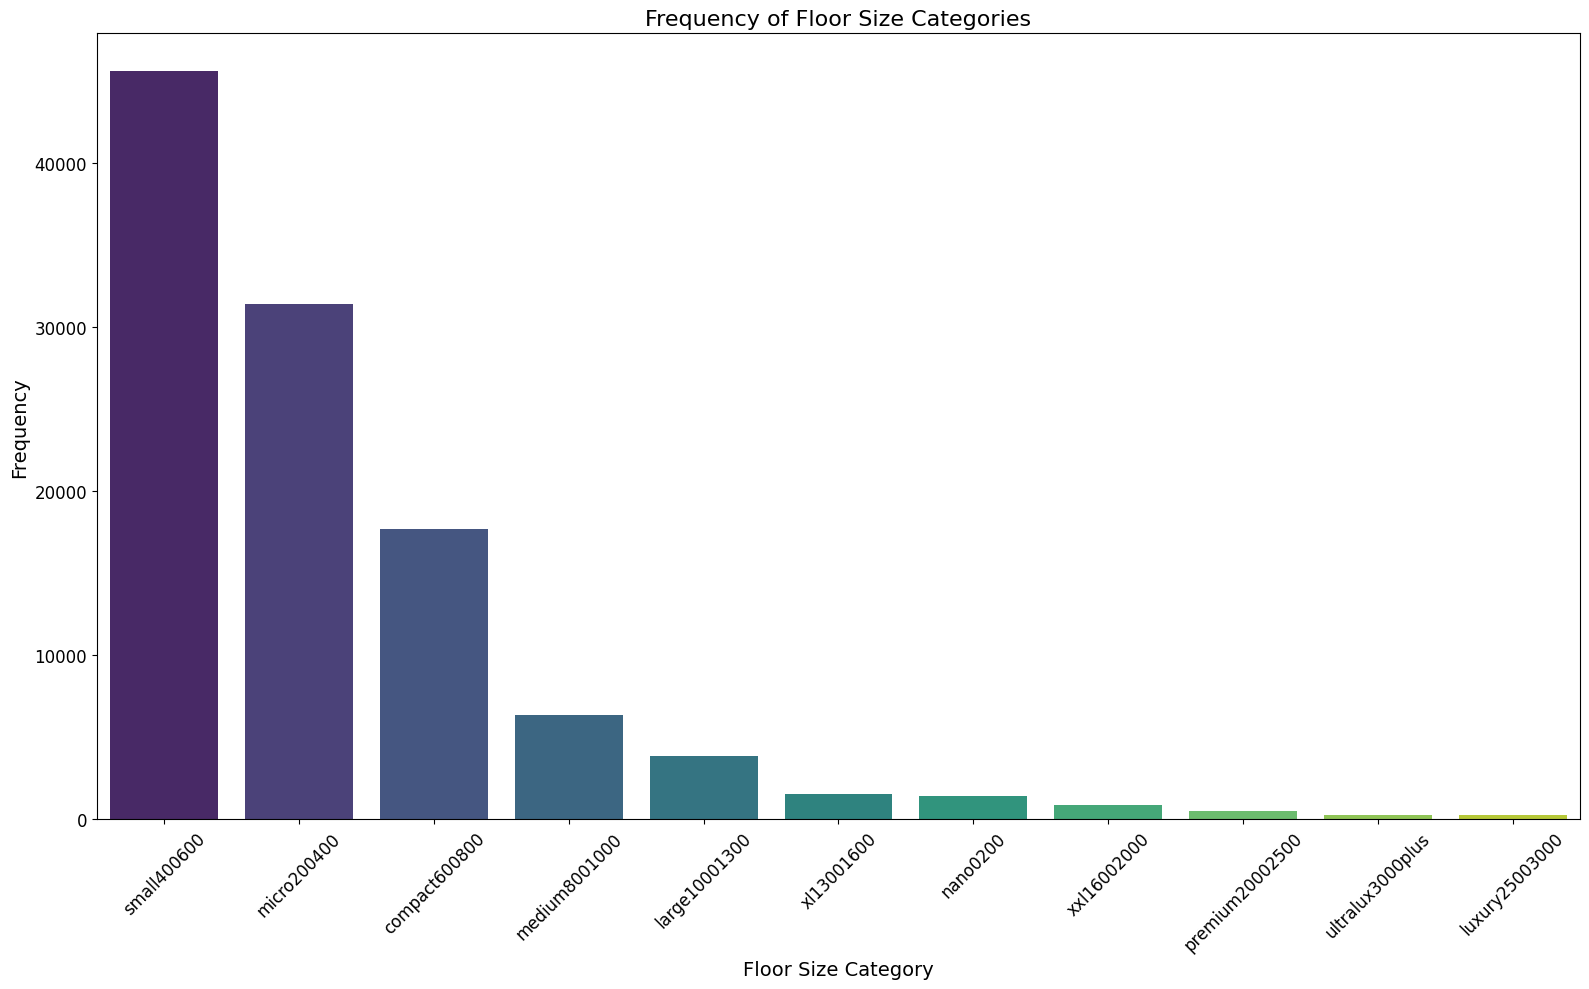

floor_size
small400600         45602
micro200400         31397
compact600800       17703
medium8001000        6376
large10001300        3875
xl13001600           1534
nano0200             1455
xxl16002000           874
premium20002500       526
ultralux3000plus      257
luxury25003000        252
Name: count, dtype: int64


In [ ]:
# Ensure the column 'saleable_area(ft^2)' is converted to numeric
merged_dataset['saleable_area(ft^2)'] = pd.to_numeric(merged_dataset['saleable_area(ft^2)'], errors='coerce')

# Updated categorization function for floor size based on saleable_area(ft^2)
def categorize_floor_size(saleable_area):
    if pd.isna(saleable_area):  # Handle NaN values
        return "unknown"  # Assign a category for missing or invalid data
    elif saleable_area < 200:
        return "nano0200"  # Size less than 200 sq ft
    elif 200 <= saleable_area < 400:
        return "micro200400"  # Size between 200 and 400 sq ft
    elif 400 <= saleable_area < 600:
        return "small400600"  # Size between 400 and 600 sq ft
    elif 600 <= saleable_area < 800:
        return "compact600800"  # Size between 600 and 800 sq ft
    elif 800 <= saleable_area < 1000:
        return "medium8001000"  # Size between 800 and 1000 sq ft
    elif 1000 <= saleable_area < 1300:
        return "large10001300"  # Size between 1000 and 1300 sq ft
    elif 1300 <= saleable_area < 1600:
        return "xl13001600"  # Size between 1300 and 1600 sq ft
    elif 1600 <= saleable_area < 2000:
        return "xxl16002000"  # Size between 1600 and 2000 sq ft
    elif 2000 <= saleable_area < 2500:
        return "premium20002500"  # Size between 2000 and 2500 sq ft
    elif 2500 <= saleable_area < 3000:
        return "luxury25003000"  # Size between 2500 and 3000 sq ft
    else:
        return "ultralux3000plus"  # Size greater than 3000 sq ft

# Apply the categorization function to the merged_dataset
merged_dataset['floor_size'] = merged_dataset['saleable_area(ft^2)'].apply(categorize_floor_size)

# Frequency count for the new floor size categories
size_category_counts = merged_dataset['floor_size'].value_counts()

# Plot the frequency of floor size categories
plt.figure(figsize=(16, 10))  # Larger figure size for better visualization
sns.barplot(x=size_category_counts.index, y=size_category_counts.values, palette="viridis")

# Add labels and title with larger font sizes
plt.xlabel("Floor Size Category", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Frequency of Floor Size Categories", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure everything fits well
plt.show()

# Display the summarized counts
print(size_category_counts)

# SAVING THE DATASET FOR NEXT STAGE

In [ ]:
merged_dataset.shape

(109851, 25)

In [ ]:
merged_dataset.head()

,saleable_area(ft^2),unit_rate,district,floor,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS,FormattedDate,new_price,YearQuarter,region,floor_height,floor_size
7,423,15792,Kowloon Kowloon City District,22.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,6680016,2023Q1,KLN,floor_21to25,small400600
13,2190,34703,Kowloon Kowloon City District,7.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,75999570,2023Q1,KLN,floor_06to08,premium20002500
14,761,15857,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,12067177,2023Q1,KLN,floor_11to13,compact600800
15,320,13717,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,4389440,2023Q1,KLN,floor_11to13,micro200400
16,519,16541,Kowloon Kowloon City District,29.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,8584779,2023Q1,KLN,floor_26to30,small400600


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109851 entries, 7 to 159611
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI                

In [ ]:
# Import the required modules
from google.colab import drive
import os  # For file path verification

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv2.csv'

# Save the merged dataset to Google Drive
try:
    merged_dataset.to_csv(file_path, index=False)
    print(f"File 'Std_Datasetv2.csv' has been saved successfully!")
    print(f"Full file path: {file_path}")
except Exception as e:
    print(f"Error while saving the file: {e}")

# Verify if the file exists
if os.path.exists(file_path):
    print(f"File verification successful: 'Std_Datasetv2.csv' exists in the directory.")
else:
    print(f"File 'Std_Datasetv2.csv' was not found in the directory!")

# Optionally unmount the drive (if needed)
drive.flush_and_unmount()
print("Drive unmounted. Please refresh Google Drive and remount if necessary.")

Mounted at /content/drive
File 'Std_Datasetv2.csv' has been saved successfully!
Full file path: /content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv2.csv
File verification successful: 'Std_Datasetv2.csv' exists in the directory.
Drive unmounted. Please refresh Google Drive and remount if necessary.
